In [24]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import illustrisAPI.data as iApi
%matplotlib inline

In [2]:
def getData(snap):
    fileName='Data/full_data/FullData_Snap.'+str(snap)+'.txt'
    fieldwidth = 16
    numfields = 5
    #data with gaps
    borkedData=np.genfromtxt(fileName,delimiter=(fieldwidth,)*numfields)
    #each part of the rows of data
    a=borkedData[::4,:]
    b=borkedData[1::4,:]
    c=borkedData[2::4,:]
    d=borkedData[3::4,:3]
    nGal=np.shape(a)[0]
    #extra space for new data we're adding
    e=np.zeros((nGal,6))
    data=np.hstack([a,b,c,d,e])
    return data
def getHistory(sub):
    passFail=1
    fileName='Data/AccHistory/AccHistInt_SubGr.'+str(int(sub))+'.txt'
    fieldwidth = 16
    numfields = 5
    #data with gaps
    borkedHistory=np.genfromtxt(fileName,delimiter=(fieldwidth,)*numfields)
    a=borkedHistory[::4,:]
    b=borkedHistory[1::4,:]
    c=borkedHistory[2::4,:]
    d=borkedHistory[3::4,:1]
    if (d.shape[0]==0):
        #print('sub: ',sub,' is weird, skipping...')
        return np.zeros(1)
    history=np.hstack([a,b,c,d])
    return history
def getGalData(snapshot):
    fileName='Data/GalaxyData/GalaxyData_Snap.'+str(snapshot)+'.txt'
    return np.genfromtxt(fileName)

In [46]:
#adding m dot and history data, reformatting fullData -> galaxyData
nSkips=0
nSkipsAlt=0
z0data=getData(135)
z0subs=z0data[:,1]
for snap in range(130,136):
    print('starting snap: ',snap)
    zData=getData(snap)
    
    mBh=iApi.getSubhaloField('SubhaloBHMass',snapshot=snap,simulation='Illustris-1')
    mDotBh=iApi.getSubhaloField('SubhaloBHMdot',snapshot=snap,simulation='Illustris-1')
    sfr=iApi.getSubhaloField('SubhaloSFR',snapshot=snap,simulation='Illustris-1')
    
    zData[:,18]=mBh[zData[:,1].astype(int)]*0.719 #sim units as 10^10 M_odot /h -> 10^10 M_odot
    zData[:,19]=mDotBh[zData[:,1].astype(int)]*0.978#sim units as 10^10 M_odot /h (0.978 Gyr/h) -> 10^10 M_odot / Gyr
    zData[:,20]=sfr[zData[:,1].astype(int)]/10#sim units as M_odot/yr -> 10^10 M_odot / Gyr
    zData[:,21]=-1*np.ones(np.shape(zData)[0]) #initializing these values as -1
    zData[:,22]=-1*np.ones(np.shape(zData)[0])
    zData[:,23]=-1*np.ones(np.shape(zData)[0])
    
    zSubs=zData[:,1]
    history=getHistory(0)
    for sub in z0subs:
        history=getHistory(sub)
        if (history.size==1):
            continue
        thisEntry=np.argwhere((history[:,0]==0) & (history[:,1]==snap))
        if (thisEntry.size==0):
            nSkips+=1
            continue
        thisSub=int(history[thisEntry,4])
        zEntry=np.argwhere(zSubs==thisSub)
        zData[zEntry,21]=sub
        if (snap<135):
            nextEntry=np.argwhere((history[:,0]==0) & (history[:,1]==snap+1))
            if (nextEntry.size==0):
                nSkipsAlt+=1
                continue
            nextSub=history[nextEntry,4]
            zData[zEntry,22]=nextSub
        if (snap>85):
            prevEntry=np.argwhere((history[:,0]==0) & (history[:,1]==snap-1))
            if (prevEntry.size==0):
                nSkipsAlt+=1
                continue
            prevSub=history[prevEntry,4]
            zData[zEntry,23]=prevSub
    saveName='Data/GalaxyData/GalaxyData_Snap.'+str(snap)+'.txt'
    np.savetxt(saveName,zData)

starting snap:  130


OSError: Unable to open file (Truncated file: eof = 2223806, sblock->base_addr = 0, stored_eoa = 17633068)

In [6]:
def lambda_cutoff_approx(eps):
    #v_s=1*np.sqrt(eps/(1-1*eps))
    v_s=0.831*np.sqrt(eps/(1-0.896*eps))
    l=1.1*v_s/np.sqrt(1+(1.1**2)*np.power(v_s,2))
    l_cut=0.65*l
    return l_cut
def lambda_cutoff(eps):
    e=np.sqrt(1-np.power(1-eps,2))
    o=0.5 * (np.arcsin(e)-e*np.sqrt(1-np.power(e,2))) / (e*np.sqrt(1-np.power(e,2)) - (1-np.power(e,2))*np.arcsin(e))
    d=0.7*eps
    v_s=np.sqrt((o*(1-d)-1)/(1+0.15*o*(1-d)))
    l=1.1*v_s/np.sqrt(1+(1.1**2)*np.power(v_s,2))
    l_cut=0.65*l
    return l_cut
#eps=np.linspace(0,1,1000)
#plt.plot(eps,lambda_cutoff(eps))

#adding normalised lambda_R / lambda_R,cutoff to full data
for snap in range(85,136):
    print('starting snap: ',snap)
    data=getGalData(snap)
    lambdas=data[:,17]
    eps=data[:,15]+0.01
    l_cut=lambda_cutoff(eps)
    l_stupid=eps/2
    data[:,16]=lambdas/l_stupid #replacing (effectively useless) alternative epsilon with scaled lambda_R/lambda_R,cutoff
    saveName='Data/GalaxyData/GalaxyData_Snap.'+str(snap)+'.txt'
    np.savetxt(saveName,data)

starting snap:  85
starting snap:  86
starting snap:  87
starting snap:  88
starting snap:  89
starting snap:  90
starting snap:  91
starting snap:  92
starting snap:  93
starting snap:  94
starting snap:  95
starting snap:  96
starting snap:  97
starting snap:  98
starting snap:  99
starting snap:  100
starting snap:  101
starting snap:  102
starting snap:  103
starting snap:  104
starting snap:  105
starting snap:  106
starting snap:  107
starting snap:  108
starting snap:  109
starting snap:  110
starting snap:  111
starting snap:  112
starting snap:  113
starting snap:  114
starting snap:  115
starting snap:  116
starting snap:  117
starting snap:  118
starting snap:  119
starting snap:  120
starting snap:  121


/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in sqrt


starting snap:  122
starting snap:  123
starting snap:  124
starting snap:  125
starting snap:  126
starting snap:  127
starting snap:  128
starting snap:  129
starting snap:  130
starting snap:  131
starting snap:  132
starting snap:  133
starting snap:  134
starting snap:  135


In [4]:
snap=135
data=getGalData(snap)
SRs=np.argwhere((data[:,14]<0.5) & (data[:,16]<1))
FRs=np.argwhere((data[:,14]<0.5) & (data[:,16]>1))
ellips=np.argwhere(data[:,14]<0.5)
print(SRs.size/ellips.size)
print(FRs.size/ellips.size)

0.11849080137199876
0.8815091986280013


/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


(0, 10)

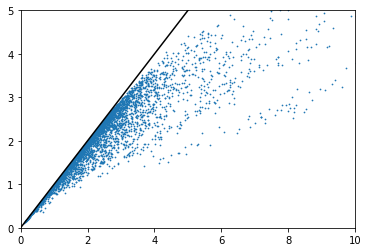

In [5]:
plt.plot(np.linspace(0,10,1000),np.linspace(0,10,1000),c='k')
plt.scatter(2*data[:,17]/data[:,15],data[:,16],s=0.5)
plt.ylim(0,5)
plt.xlim(0,10)